In [2]:
# Include relevant packages
# Reduce the minimum methods in the notebook
# Put everything in pyACC
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import sys
sys.path.append('../')

from pyACC.helpers import Logger
print = Logger("Half Course Project")

from pyACC.Cosmology import CosmologicalDistances

IndentationError: expected an indented block (distances.py, line 52)

In [ ]:
# Theory

# Define your functions to get cosmological distances from a list of redshifts and different
# cosmological models
# 1. LCDM
# 2. wCDM
# 3. your choice

In [ ]:
#Cosmological parameters
H0 = 70
omega_m = 0.3

# Implement your favourite Hubble function
def hubble_function(z, Omega_M, H0):
    """
    Compute the Hubble function at redshift z for LambdaCDM cosmology.

    Parameters
    ----------
    z : float
        Redshift.
    Omega_M : float
        Matter density parameter.
    H0 : float
        Hubble constant.
    
    Returns
    -------
    float
        Hubble function at redshift z.
    """
    
    return H0 * np.sqrt(Omega_M * (1+z)**3 + (1-Omega_M))

In [ ]:
#Instantiation of a CosmologicalDistances class object
cd = CosmologicalDistances(hubble_function, omega_m, H0)

In [3]:
#Redshift list
redshift_list = np.linspace(0.01, 2.2, 100)

#Computation of distances modulus mu for every z in redshift_list
mu = np.array([cd.distance_modulus(z) for z in redshift_list])

#Computation of luminosity_distance for every z in redshift_list
'''
Why do we have a method that depends not only on z? And what is 1?
'''
luminosity_distance = np.array([cd.luminosity_distance(z,omega_m, 1  ) for z in redshift_list])
'''
For Hubble distance depending by redshift, do we mean comoving distance (as 1/H0 * integral in dz' of c/E(z'))? 
'''
hubble_distance = np.array([cd.hubble_distance(z) for z in redshift_list])

'''
How do we define this distance?
'''
transverse_comoving_distance = np.array([cd.transverse_comoving_distance(z) for z in redshift_list])

NameError: name 'cd' is not defined

In [ ]:
# Dataset

# Read the datasets, and plot the data against Planck 2018 LCDM cosmology

In [4]:
print("Read SN data")
'''
Explanation of following line:
- SN_data = pd.read_csv("./data/SNIa_data.txt", sep=" ", header=None, names=["Redshift", "Distance"])

This line reads data from a CSV (Comma-Separated Values) file named "SNIa_data.txt" located in the "./data" directory.
It uses pandas' read_csv() function to read the data into a DataFrame (i.e. a two-dimensional labeled data structure,
essentially a table divided in rows and columns) called SN_data.

Separating it in pieces:
- ./data/SNIa_data.txt: specifies the path to the CSV file;
- sep=" ": specifies that the separator between values in the file is a space;
- header=None: indicates that there is no header row in the file;
- names=["Redshift", "Distance"]: specifies the column names to be used for the DataFrame.
'''
SN_data = pd.read_csv("./data/SNIa_data.txt", sep=" ", header=None, names=["Redshift", "Distance"])

'''
Explanation of following line:
- SN_covariance = np.genfromtxt("./data/SNIa_covariance.txt")
This line reads data from a text file named "SNIa_covariance.txt" located in the "./data" directory. 
It uses NumPy's genfromtxt() function to read the data into a NumPy array called SN_covariance.
(We are presumably reading a corance matrix)
'''
SN_covariance = np.genfromtxt("./data/SNIa_covariance.txt")

'''
Explanation of following 3 lines:
- SN_data["Error"] = np.sqrt(np.diag(SN_covariance))
This line calculates the square root of the diagonal elements of the covariance matrix (SN_covariance)
using NumPy's sqrt() and diag() functions, and assigns the result to a new column named "Error" in the DataFrame SN_data.

-SN_data["Kind"] = "\mu"
Add a column to SN_data with name \mu and all elements \mu

-SN_data["Name"] = "Pantheon+"
Add a column to SN_data tith name Pantheon+ and all element Pantheon+
'''
SN_data["Error"] = np.sqrt(np.diag(SN_covariance))
SN_data["Kind"] = "\mu"
SN_data["Name"] = "Pantheon+"


2024-04-05 09:37:36.737617 :: Half Course Project  :: Read SN data


In [ ]:
SN_data

,Redshift,Distance,Error,Kind,Name
0,0.01012,13.909104,0.199394,\mu,Pantheon+
1,0.01038,14.046894,0.205908,\mu,Pantheon+
2,0.01043,13.927942,0.201482,\mu,Pantheon+
3,0.01082,14.008714,0.185679,\mu,Pantheon+
4,0.01209,13.976718,0.192585,\mu,Pantheon+
...,...,...,...,...,...
1002,1.55000,26.006720,0.194426,\mu,Pantheon+
1003,1.70000,26.058309,0.289536,\mu,Pantheon+
1004,1.80000,26.201409,0.197367,\mu,Pantheon+
1005,1.91400,26.160282,0.262894,\mu,Pantheon+


In [ ]:
print("Read BAO data")
BAO_data = pd.read_csv("./data/BAO_data.txt")
BAO_covariance = pd.read_csv("./data/BAO_covariance.txt", header=None).replace(np.NaN, 0).to_numpy()

# Sound horizon from Planck 2018, Table 2, TT,TE,EE+lowE
rd = 147.06

2024-04-03 10:44:23.795743 :: Half Course Project :: INFO :: Read BAO data


In [ ]:
BAO_data

,Redshift,Distance,Error,Kind,Name
0,0.15,4.47,0.17,D_V/r_d,MGS
1,0.38,10.23,0.17,D_M/r_d,BOSS DR12
2,0.38,25.00,0.76,D_H/r_d,BOSS DR12
3,0.51,13.36,0.21,D_M/r_d,BOSS DR12
4,0.51,22.33,0.58,D_H/r_d,BOSS DR12
5,0.70,17.86,0.33,D_M/r_d,eBOSS LRG
6,0.70,19.33,0.53,D_H/r_d,eBOSS LRG
7,0.85,18.33,0.06,D_V/r_d,eBOSS ELG
8,1.48,30.69,0.80,D_M/r_d,eBOSS Quasar
9,1.48,13.26,0.55,D_H/r_d,eBOSS Quasar


In [ ]:
np.log10(H0)

1.845098040014257

Text(0.5, 1.0, 'SNIa - Distance Modulus')

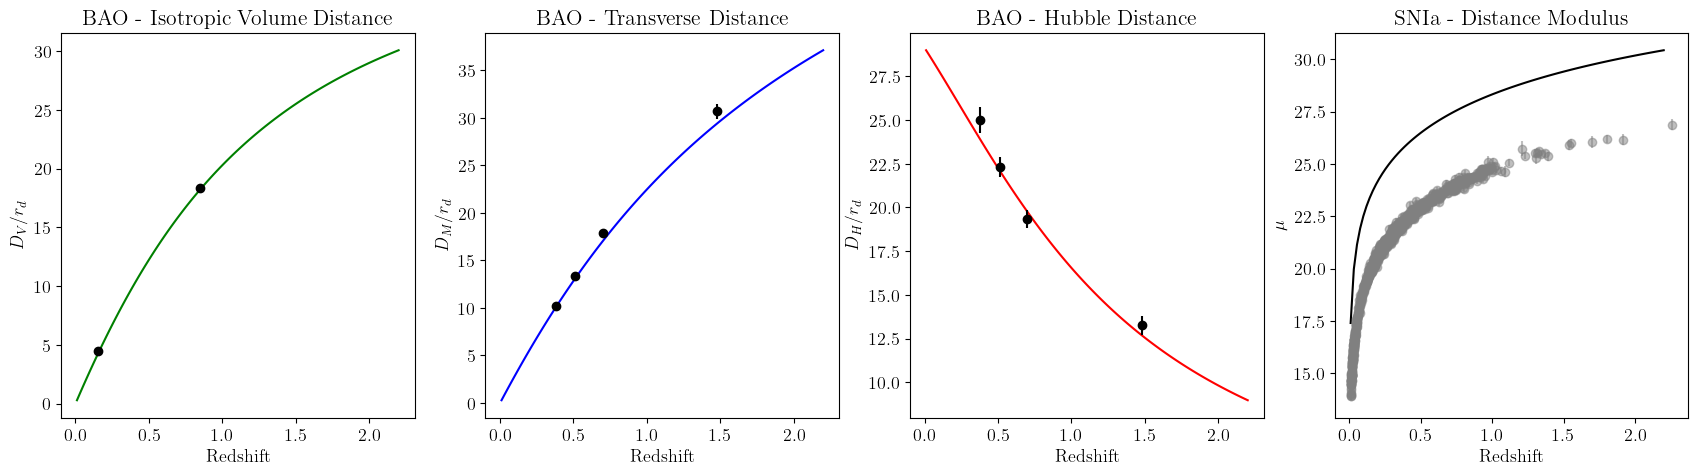

In [ ]:
distance_type = pd.unique(BAO_data["Kind"])

fig, ax = plt.subplots(1, 4, figsize=(21, 5))
ax[0].plot(redshift_list, np.power(redshift_list * transverse_comoving_distance**2 * hubble_distance, 1./3)/rd, color="g")
ax[1].plot(redshift_list, transverse_comoving_distance/rd, color="b")
ax[2].plot(redshift_list, hubble_distance/rd, color="r")
ax[3].plot(redshift_list, 5*np.log10(luminosity_distance), color="k")

for i,dt in enumerate(distance_type):
    data = BAO_data[BAO_data["Kind"] == dt]
    ax[i].errorbar(data["Redshift"], data["Distance"], yerr=data["Error"], fmt='o', color="k")
    ax[i].set_xlabel("Redshift")
    ax[i].set_ylabel(r"$%s$"%dt)

ax[3].errorbar(SN_data["Redshift"], SN_data["Distance"], yerr=SN_data["Error"], fmt='o', color="0.5", alpha=0.5)
ax[3].set_xlabel("Redshift")
ax[3].set_ylabel(r"$\mu$")

ax[0].set_title("BAO - Isotropic Volume Distance")
ax[1].set_title("BAO - Transverse Distance")
ax[2].set_title("BAO - Hubble Distance")
ax[3].set_title("SNIa - Distance Modulus")


In [ ]:
# Likelihood

# Define the likelihood function for the data

In [ ]:
# Likelihood maximization
# Use scipy.optimize to maximize the likelihood function for different cosmological models
# Get best-fit parameters and plot the best-fit model against the data and Planck 2018 cosmology

In [ ]:
# Model selection
# Test different models using the likelihood ratio test

In [ ]:
# Sample the posterior

# Define the priors for the cosmological parameters
# Sample the posterior using MCMC in pyACC
# Clean the chains and plot the results

In [ ]:
# Analyze the results

# Get relevant quantities from marginalized posteriors
# Check consistency with maximum likelihood results
# Check consistency with Planck 2018 results
# Plot the chains
# Plot the posterior distributions

In [ ]:
# Summarize your results

# Write a report with your results
# put emphasis on the numerical part, specyfing the numerical techniques used.
# Share your results in form of chains